# CIS-053-74050 Introduction to Machine Learning Fall 2023
# Final Exam Report

### Authors: Josie Miller, Will (Yizhe) Wang

## Executive Summary

1. **Purpose:** This report presents a comprehensive analysis of predictive modeling techniques applied to the Titanic dataset. Our goal was to identify the model that most accurately predicts survival outcomes based on a range of passenger characteristics.

2. **Methodology:** We employed a systematic approach to evaluate various classification models. The data was preprocessed using standardization, normalization, and min-max scaling techniques. We then applied a grid search to optimize hyperparameters for each model, considering factors such as max depth, number of estimators, regularization strength, learning rate, and so on. Our analysis included well-established models like Decision Tree, Random Forest, Support Vector Classifier (SVC), and Logistic Regression, as well as ensemble methods and neural networks (MLP).

## Key Findings
1. **Superior Performance of Random Forest:** The Random Forest Classifier emerged as the most effective model, achieving the highest accuracy of 0.8547. This demonstrates its aptness for the dataset.
2. **Model Performance Variance:** There was a considerable range in accuracies across different models, from about 0.78 to 0.85, highlighting the impact of model selection on predictive outcomes.
3. **Optimal Parameter Identification:** Optimal parameter sets for each model were determined through grid search, maximizing performance.
4. **Kaggle Score Discrepancy:** A notable difference was observed between the highest accuracy obtained in the experiments and the final Kaggle score of 0.7751, suggesting potential overfitting or dataset differences.

## Implications
1. **Importance of Model Selection:** The results emphasize the crucial role of selecting the appropriate model, with Random Forest showing particular promise for this dataset.
2. **Need for Enhanced Generalization:** The gap between experimental results and the Kaggle score indicates a need for improved model generalization, potentially through more robust cross-validation or model complexity reevaluation.
3. **Effective Feature Engineering:** The feature engineering approaches, including the creation of variables like 'family_size', 'is_alone', and 'name_title', appear to have positively impacted model accuracy.

## Conclusion
The analysis identified the Random Forest Classifier as the most suitable model for this dataset. However, the lower Kaggle score(0.77-0.78) compared to experimental results suggests a need for improved generalization. Future efforts should focus on refining model parameters, employing stricter cross-validation methods, or reexamining feature engineering processes. Exploring advanced models or ensemble techniques might also aid in bridging the performance gap.


## Additional Information:

Detailed parameters for the best-performing models are documented within the report. The appendix section includes the full codebase utilized during the analysis to facilitate reproducibility and encourage further research in this area.



## Background

- The Titanic disaster, where the ship sank on April 15, 1912 during its maiden voyage after hitting an iceberg, is a historic tragedy. It resulted in the loss of 1502 lives out of 2224 on board. Known as the DieTanic, this catastrophe, which occurred despite the ship costing $7.5 million to build, remains unforgettable worldwide. The Titanic dataset serves as an excellent resource for beginners in data science, offering a foundation for Kaggle competitions.

- The Objective of this notebook is to give an idea how is the workflow in any predictive modeling problem. How do we check features, how do we add new features and some Machine Learning Concepts. I have tried to keep the notebook as basic as possible so that even newbies can understand every phase of it.


### Our Approach:

#### Part 1: Exploratory Data Analysis (EDA):
- **Initial Data Inspection:** Conducted a preliminary review of the dataset to understand its structure, missing values, and feature types.
- **Feature Distribution Analysis:** An analysis of feature distributions and their impact on the target variable was performed.
- **Correlation and Trend Exploration:** Explored correlations and trends among features to inform subsequent feature engineering and modeling steps.

#### Part 2: Feature Engineering and Data Cleaning:
- **Feature Creation and Transformation:** Developed new features such as 'family_size', 'is_alone', and 'name_title', enhancing the dataset's informational value.
- **Categorical to Numeric Conversion:** Transformed categorical variables like 'Sex' and 'Embarked' into numeric formats for compatibility with machine learning models.
- **Handling Missing Values and Redundancies:** Dealt with missing data and removed redundant features (e.g., 'PassengerId', 'Cabin', 'Name', 'Ticket') to streamline the dataset.

#### Part 3: Predictive Modeling:
- **Model Selection and Hyperparameter Tuning:** Employed GridSearchCV for rigorous hyperparameter tuning across a variety of models: Decision Tree, Random Forest, SVM, Logistic Regression, Ensemble methods (Bagging, Boosting), and MLP.
- **Cross-Validation Strategy:** Implemented 10-fold cross-validation to ensure model reliability and mitigate overfitting.
- **Comparative Model Analysis:** Conducted a comprehensive comparison of the models' performances to identify the most effective approach.

#### Part 4: Result Analysis and Visualization:
- **Performance Evaluation:** Evaluated the models based on their accuracy scores, identifying the most effective algorithms for this specific dataset.
- **Visualization of Results:** Plotted the accuracy of each model to visually compare their performance, aiding in the interpretation and presentation of the results.

### A survey of what others have done in this area

- Titanic survival prediction has been a very popular ML challenge. To examine various approaches to the problem, multiple articles presenting solutions have been collected. The articles are from the following websites: ActiveState (Bohorquez, 2021), Towards Data Science (Donges, 2018), Medium (Melodyyip, 2022), Better Programming (randerson112358, 2019), Geeks for Geeks (GeeksforGeeks 2023), PianalytiX (PianalytiX), Louisiana State University Math (Kenny et. al), and LinkedIn (Agarwal 2020). 
- Almost all of these solutions include feature engineering to condense similar features. For example, most of the articles combined ‘Parch’ and ‘Sibsp’ into a ‘family_size’ feature that is the sum of those two columns. They also all tended to plot correlation matrices did basic exploratory analysis, and chose their features based on these two. Cross-validation was not common.
- For model selection, most of the articles chose to test many different classification models, comparing their accuracy. These models included Random Forest Classifier, Decision Tree Classifier, KNN, Logistic Regression, Support Vector Machine, Perceptron, and Gaussian Naive Bayes.
- Most articles’ accuracy score for their best model was 70-80, however, some solutions that were prone to overfitting had higher accuracy scores (in the 90s). Every article had a slightly different approach, some more complex than others, leading to differences in accuracy.





In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import (
    FunctionTransformer, MinMaxScaler, Normalizer, OneHotEncoder, StandardScaler
)
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

In [2]:
training_file_path = './train.csv'
testing_file_path = './test.csv'

In [3]:
file_path = training_file_path
df = pd.read_csv(file_path, index_col=False)

In [4]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
356,357,1,1,"Bowerman, Miss. Elsie Edith",female,22.0,0,1,113505,55.0000,E33,S
712,713,1,1,"Taylor, Mr. Elmer Zebley",male,48.0,1,0,19996,52.0000,C126,S
175,176,0,3,"Klasen, Mr. Klas Albin",male,18.0,1,1,350404,7.8542,NaN,S
260,261,0,3,"Smith, Mr. Thomas",male,NaN,0,0,384461,7.7500,NaN,Q
713,714,0,3,"Larsson, Mr. August Viktor",male,29.0,0,0,7545,9.4833,NaN,S


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
def feature_engineering(df):
    df['Sex'] = df['Sex'].replace({'male': 0, 'female': 1})
    title_mappings = {
        'Mlle': 'Miss', 'Ms': 'Miss', 'Mme': 'Mrs',
        'Countess': 'Rare', 'Capt': 'Rare', 'Col': 'Rare',
        'Don': 'Rare', 'Major': 'Rare', 'Sir': 'Rare',
        'Jonkheer': 'Rare', 'Dona': 'Rare', 'Lady': 'Rare',
        'Dr': 'Rare', 'Rev': 'Rare'
    }
    title_numeric_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
    def extract_and_map_title(name):
        title = name.split(',')[1].split('.')[0].strip()
        title = title_mappings.get(title, title)
        return title_numeric_mapping.get(title, 0)
    
    df['name_title'] = df['Name'].apply(extract_and_map_title)
    
    df['family_size'] = (df['SibSp'] + df['Parch'] + 1)
    df['is_alone'] = (df['family_size'] == 1).astype('int')
    
    df['Deck'] = df['Cabin'].apply(lambda x: x[0] if pd.notna(x) else 'Unknown')
    df['Cabin_Missing'] = df['Cabin'].isna().astype(int)
    df['Cabin_Count'] = df['Cabin'].apply(lambda x: len(x.split()) if pd.notna(x) else 0)
    df['Embarked'] = df['Embarked'].replace({'S': 0, 'C': 1, 'Q': 2})
    
    df = df.drop(['PassengerId', 'Cabin', 'Name', 'Ticket'], axis=1)
    return df
df = feature_engineering(df)
X, y = df.drop("Survived", axis=1), df["Survived"]

In [9]:
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()
correlation_matrix

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,name_title,family_size,is_alone,Cabin_Missing,Cabin_Count
Survived,1.000000,-0.338481,0.543351,-0.077221,-0.035322,0.081629,0.257307,0.108669,0.402501,0.016639,-0.203367,-0.316912,0.277053
Pclass,-0.338481,1.000000,-0.131900,-0.369226,0.083081,0.018443,-0.549500,0.043835,-0.166074,0.065997,0.135207,0.725541,-0.647116
Sex,0.543351,-0.131900,1.000000,-0.093254,0.114631,0.245489,0.182333,0.118593,0.497368,0.200988,-0.303646,-0.140391,0.129430
Age,-0.077221,-0.369226,-0.093254,1.000000,-0.308247,-0.189119,0.096067,0.012186,-0.106722,-0.301914,0.198270,-0.249732,0.172708
SibSp,-0.035322,0.083081,0.114631,-0.308247,1.000000,0.414838,0.159651,-0.060606,0.273333,0.890712,-0.584471,0.040460,0.012150
Parch,0.081629,0.018443,0.245489,-0.189119,0.414838,1.000000,0.216225,-0.079320,0.319680,0.783111,-0.583398,-0.036987,0.127846
Fare,0.257307,-0.549500,0.182333,0.096067,0.159651,0.216225,1.000000,0.063462,0.130889,0.217138,-0.271832,-0.482075,0.596171
Embarked,0.108669,0.043835,0.118593,0.012186,-0.060606,-0.079320,0.063462,1.000000,0.049735,-0.081057,0.018867,-0.016190,0.017875
name_title,0.402501,-0.166074,0.497368,-0.106722,0.273333,0.319680,0.130889,0.049735,1.000000,0.346520,-0.411932,-0.123896,0.100052
family_size,0.016639,0.065997,0.200988,-0.301914,0.890712,0.783111,0.217138,-0.081057,0.346520,1.000000,-0.690922,0.009175,0.072174


<Axes: >

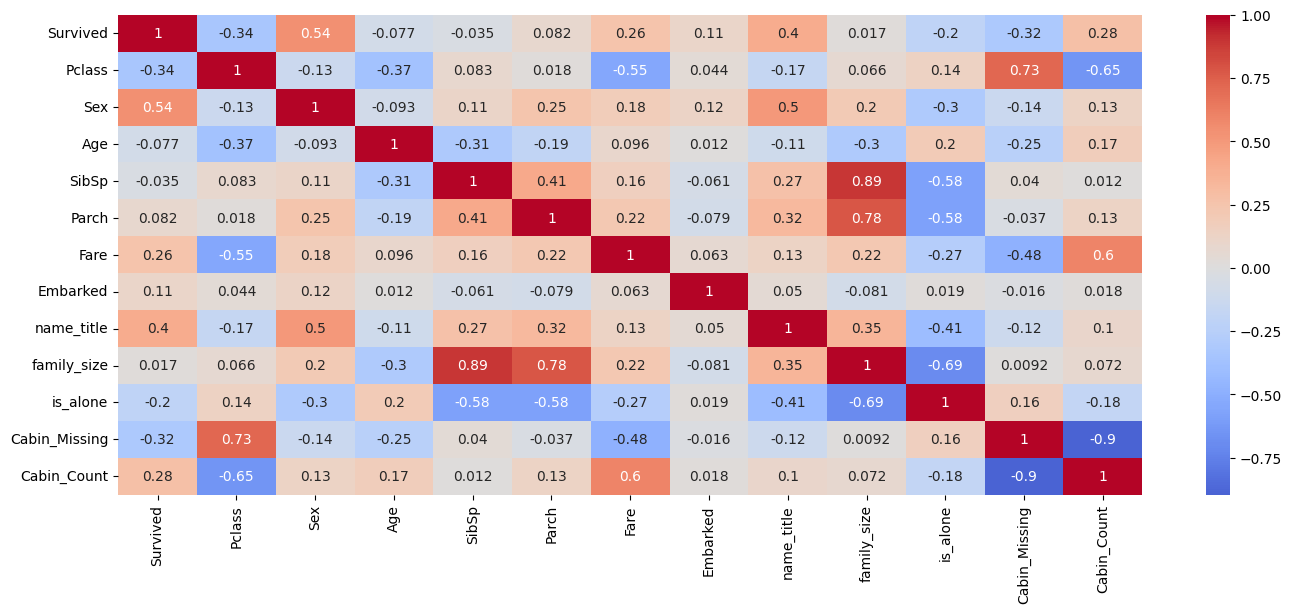

In [10]:
plt.subplots_adjust(left=1, right=3, top=1.5, bottom=0.5)
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0)

/Users/willwang/.pyenv/versions/3.10.10/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 640x480 with 0 Axes>

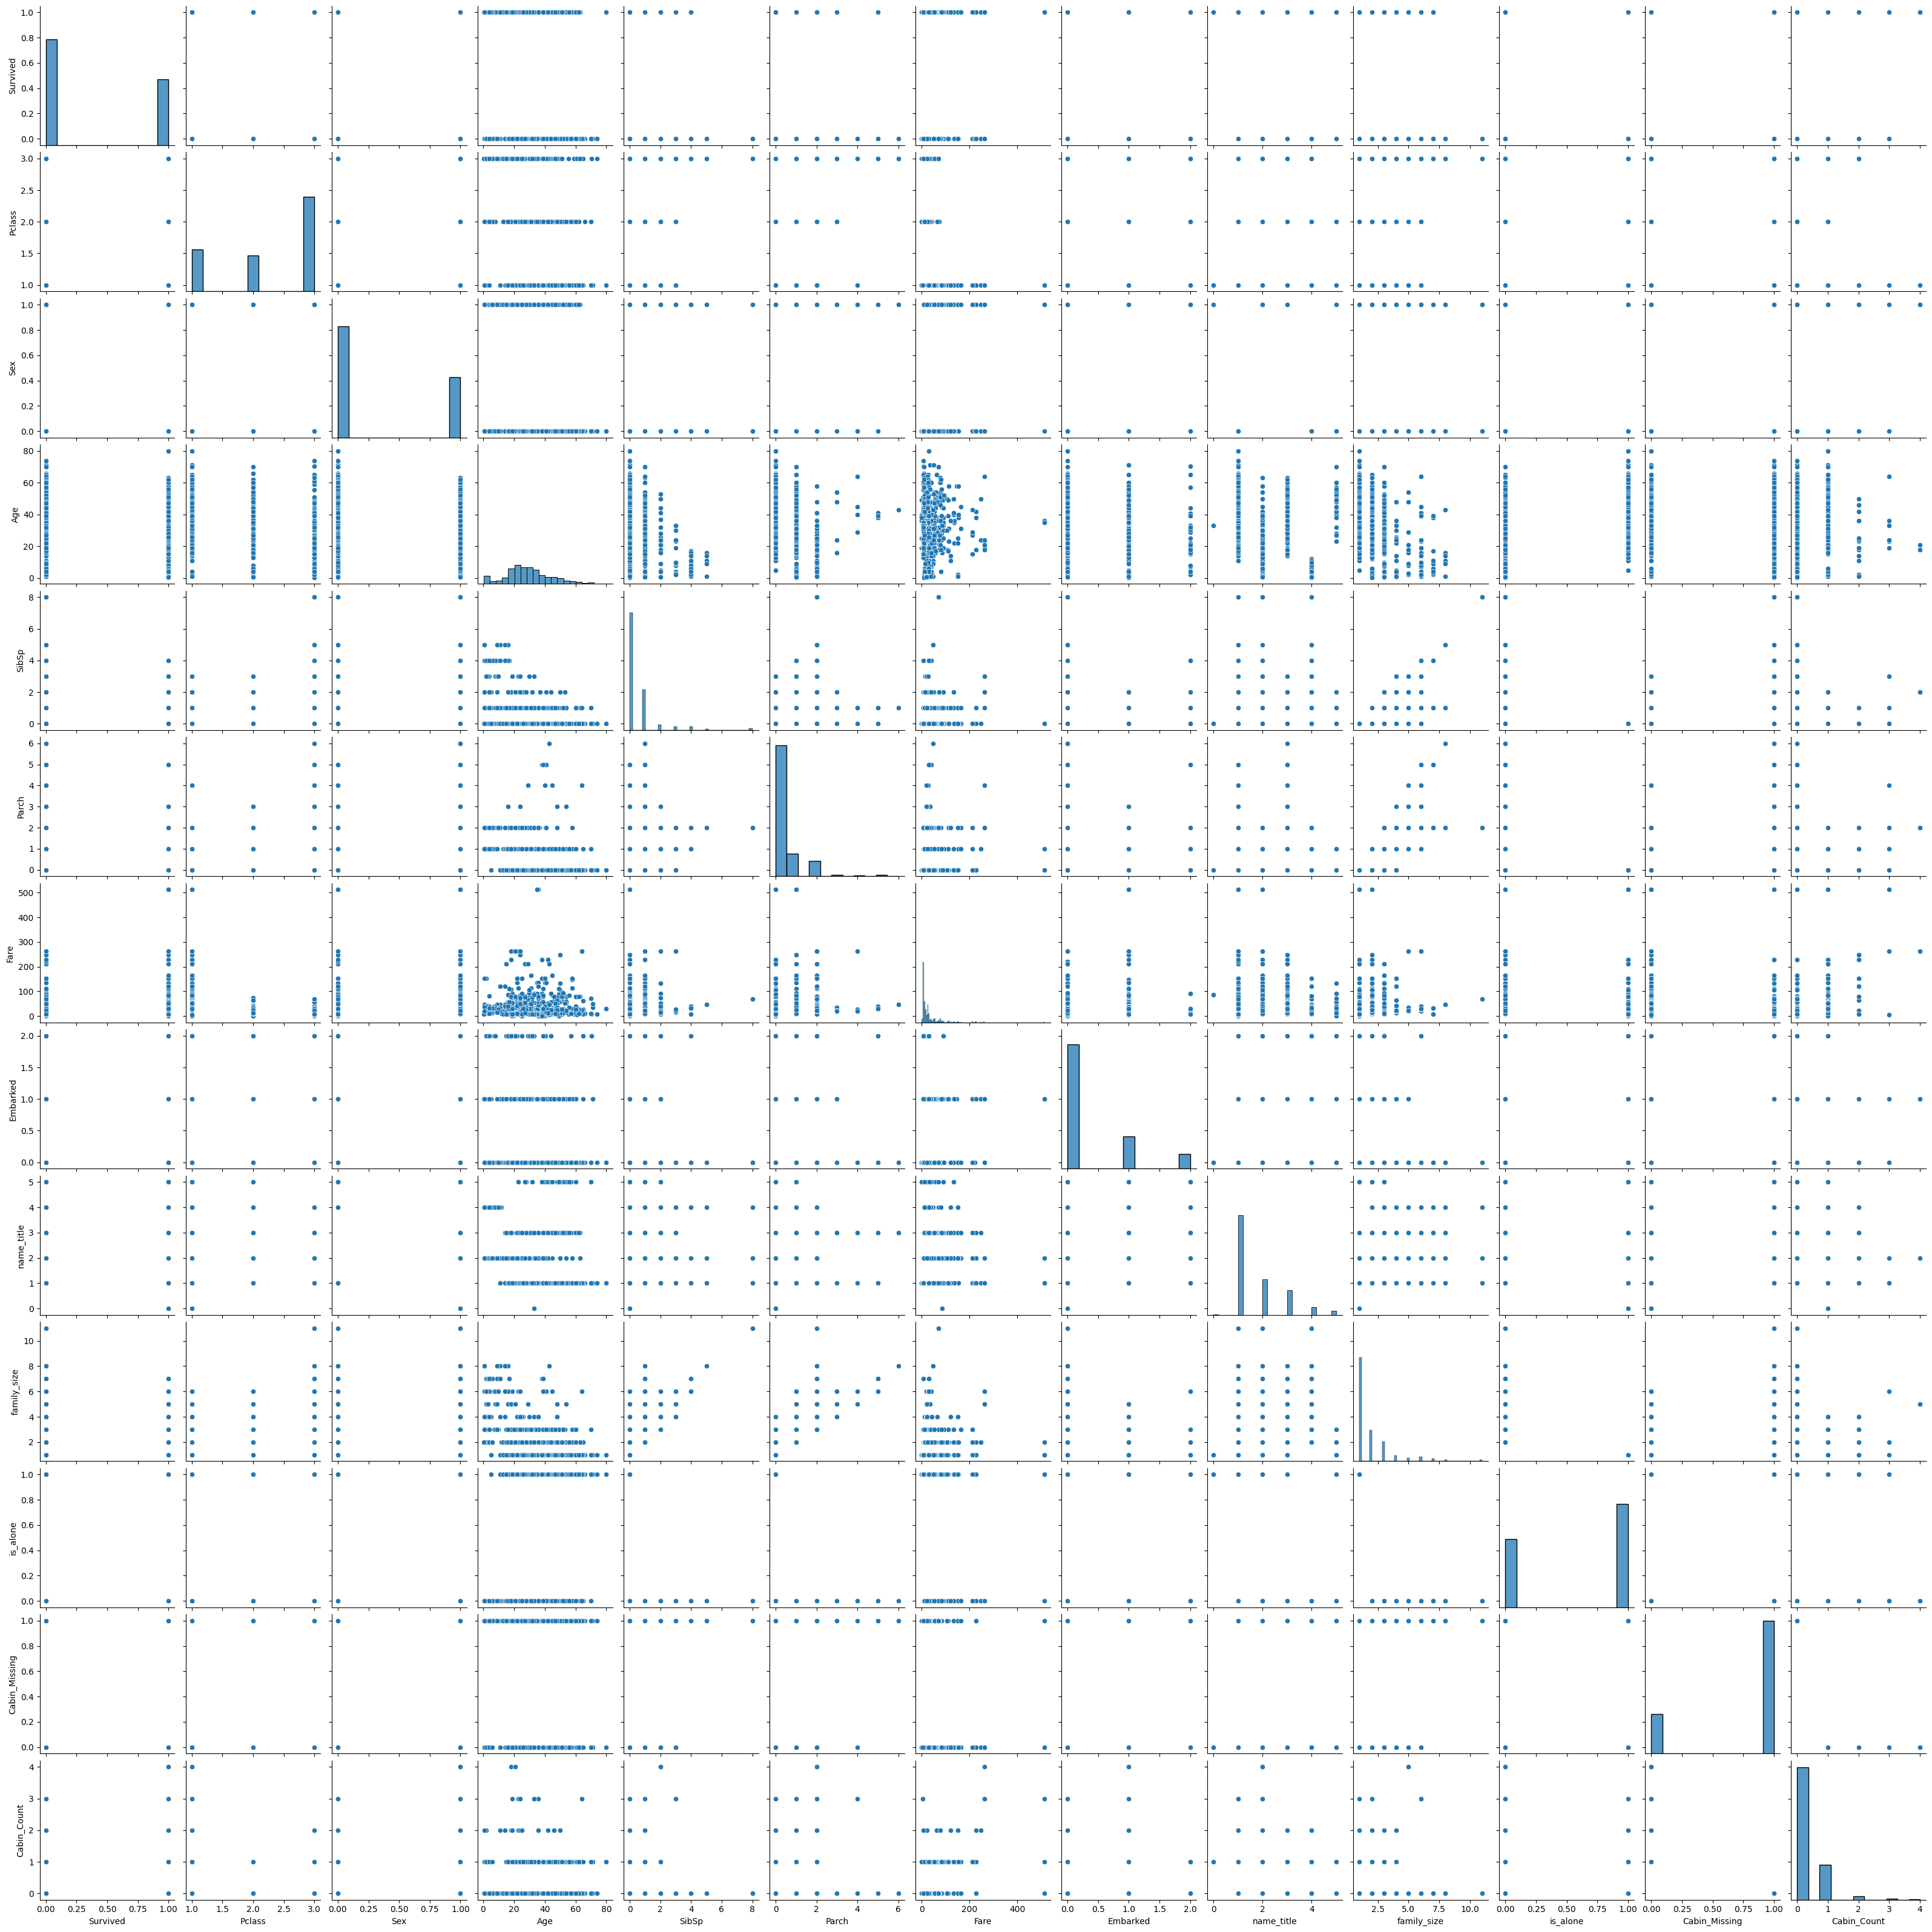

In [19]:
plt.tight_layout()
sns.pairplot(df)

Down below, we have a stepwise regression for feature selection. While this approach can be effective, but it's usually more suited to linear models. Given that we're using a variety of classifiers, including tree-based methods and neural networks, this might be not be very suitable for our case.

In [20]:
# def stepwise_selection(X, y,
#                        initial_list=[],
#                        threshold_in=0.01,
#                        threshold_out=0.05,
#                        verbose=True):
#     included = list(initial_list)

#     while True:
#         changed = False

#         # Forward step
#         excluded = list(set(X.columns) - set(included))
#         new_pval = pd.Series(index=excluded)

#         for new_column in excluded:
#             model_data = sm.add_constant(X[included + [new_column]]).copy()
            
#             # Convert non-numeric columns to numeric
#             non_numeric_columns = model_data.select_dtypes(exclude=[np.number]).columns
#             model_data[non_numeric_columns] = model_data[non_numeric_columns].astype('category').apply(lambda x: x.cat.codes)
            
#             model = sm.OLS(y, model_data).fit()
#             new_pval[new_column] = model.pvalues[new_column]

#         best_pval = new_pval.min()

#         if best_pval < threshold_in:
#             best_feature = new_pval.idxmin()
#             included.append(best_feature)
#             changed = True
#             if verbose:
#                 print(f'Add  {best_feature:30} with p-value {best_pval:.6f}')

#         # Backward step
#         model_data = sm.add_constant(X[included]).copy()
        
#         # Convert non-numeric columns to numeric
#         non_numeric_columns = model_data.select_dtypes(exclude=[np.number]).columns
#         model_data[non_numeric_columns] = model_data[non_numeric_columns].astype('category').apply(lambda x: x.cat.codes)
        
#         model = sm.OLS(y, model_data).fit()
        
#         # Use all coefficients except intercept
#         pvalues = model.pvalues.iloc[1:]
#         worst_pval = pvalues.max()  # null if pvalues is empty

#         if worst_pval > threshold_out:
#             changed = True
#             worst_feature = pvalues.idxmax()
#             included.remove(worst_feature)
#             if verbose:
#                 print(f'Drop {worst_feature:30} with p-value {worst_pval:.6f}')

#         if not changed:
#             break

#     return included


# result = stepwise_selection(X, y)

# xgb_model = XGBClassifier(max_depth=11,
#                           learning_rate=0.1,
#                           n_estimators=500,
#                           subsample=0.75,
#                           colsample_bylevel=1,
#                           colsample_bytree=1,
#                           scale_pos_weight=1.5,
#                           reg_lambda=1.5,
#                           reg_alpha=5,
#                           n_jobs=8,
#                           random_state=42,
#                           use_label_encoder=False,
#                           verbosity=0)


In [21]:
X.sample(10)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,name_title,family_size,is_alone,Deck,Cabin_Missing,Cabin_Count
267,3,0,25.00,1,0,7.7750,0.0,1,2,0,Unknown,1,0
601,3,0,NaN,0,0,7.8958,0.0,1,1,1,Unknown,1,0
755,2,0,0.67,1,1,14.5000,0.0,4,3,0,Unknown,1,0
588,3,0,22.00,0,0,8.0500,0.0,1,1,1,Unknown,1,0
685,2,0,25.00,1,2,41.5792,1.0,1,4,0,Unknown,1,0
314,2,0,43.00,1,1,26.2500,0.0,1,3,0,Unknown,1,0
116,3,0,70.50,0,0,7.7500,2.0,1,1,1,Unknown,1,0
52,1,1,49.00,1,0,76.7292,1.0,3,2,0,D,0,1
497,3,0,NaN,0,0,15.1000,0.0,1,1,1,Unknown,1,0
562,2,0,28.00,0,0,13.5000,0.0,1,1,1,Unknown,1,0


In [14]:
MODELS_PARAM_GRID = {
    DecisionTreeClassifier(): {
        "classifier__max_depth": [None, 10, 20, 30, 40, 50, 60],
        "classifier__min_samples_split": [2, 5, 7, 10],
        "classifier__min_samples_leaf": [1, 2, 4, 8],
        "classifier__random_state": [0]
    },
    RandomForestClassifier(): {
        "classifier__n_estimators": [50, 100, 200],
        "classifier__max_features": ["sqrt", "log2", None],
        "classifier__max_depth": [10, 20, 30, 40, 50, None],
        "classifier__min_samples_split": [2, 5, 10],
        "classifier__min_samples_leaf": [1, 2, 4],
        "classifier__random_state": [0]
    },
    SVC(): {
        "classifier__C": [0.1, 1, 10, 100],
        "classifier__gamma": [1, 0.1, 0.01, 0.001],
        "classifier__kernel": ["rbf", "poly", "sigmoid"],
        "classifier__random_state": [0]
    },
    MLPClassifier(): {
        "classifier__hidden_layer_sizes": [(50,), (100,)],
        "classifier__activation": ["tanh", "relu"],
        "classifier__solver": ["adam"],
        "classifier__alpha": [0.0001, 0.05],
        "classifier__max_iter": [500],
        "classifier__early_stopping": [True],
        "classifier__learning_rate_init": [0.001, 0.01],
        "classifier__random_state": [0]
    },
    BaggingClassifier(): {
        "classifier__n_estimators": [10, 50, 100],
        "classifier__max_samples": [0.5, 1.0],
        "classifier__max_features": [0.5, 1.0],
        "classifier__random_state": [0]
    },
    AdaBoostClassifier(): {
        "classifier__n_estimators": [50, 100, 200],
        "classifier__learning_rate": [0.01, 0.1, 1],
        "classifier__random_state": [0]
    },
    XGBClassifier(): {
        "classifier__n_estimators": [100, 200, 300],
        "classifier__learning_rate": [0.01, 0.1, 0.2],
        "classifier__max_depth": [3, 4, 5],
        "classifier__random_state": [0]
    },
    LogisticRegression(): {
        "classifier__C": [0.1, 1, 10, 100],
        "classifier__penalty": ["l1", "l2"],
        "classifier__solver": ["liblinear"],
        "classifier__random_state": [0]
    },
}

In [15]:
class BatchProcessModel:
    def __init__(self, X, y, data_preprocessing_strategy="standardize"):
        numeric_features = X.select_dtypes(include=["int64", "float64"]).columns
        categorical_features = X.select_dtypes(include=["object"]).columns
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            X, y, test_size=0.2, random_state=0
        )

        std_numeric_transformer = Pipeline(
            steps=[
                ("imputer", SimpleImputer(strategy="median")),
                ("scaler", StandardScaler()),
            ]
        )
        norm_numeric_transformer = Pipeline(
            steps=[
                ("imputer", SimpleImputer(strategy="median")),
                ("scaler", Normalizer()),
            ]
        )
        min_max_numeric_transformer = Pipeline(
            steps=[
                ("imputer", SimpleImputer(strategy="median")),
                ("scaler", MinMaxScaler()),
            ]
        )

        available_numeric_transformers = {
            "standardize": std_numeric_transformer,
            "normalize": norm_numeric_transformer,
            "min_max": min_max_numeric_transformer,
        }

        self.numeric_transformer = available_numeric_transformers[
            data_preprocessing_strategy
        ]
        self.categorical_transformer = Pipeline(
            steps=[
                ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
                ("onehot", OneHotEncoder(handle_unknown="ignore")),
            ]
        )
        self.preprocessor = ColumnTransformer(
            transformers=[
                ("num", self.numeric_transformer, numeric_features),
                ("cat", self.categorical_transformer, categorical_features),
            ]
        )

        self.results = {}
    def preprocess_data(self, model):
        return Pipeline([("preprocessor", self.preprocessor), ("classifier", model)])
        

    def gen_results(self):
        for model, param_grid in MODELS_PARAM_GRID.items():
            pipeline = self.preprocess_data(model)
            grid_search = GridSearchCV(pipeline, param_grid, cv=10, n_jobs=-1, verbose=1)
            grid_search.fit(self.X_train, self.y_train)
            best_model = grid_search.best_estimator_
            predictions = best_model.predict(self.X_test)
            accuracy = accuracy_score(self.y_test, predictions)

            self.results[type(model).__name__] = {
                "best_parameters": grid_search.best_params_,
                "accuracy": accuracy,
            }

    def plot_results(self):
        model_names = list(self.results.keys())
        accuracies = [self.results[model]["accuracy"] for model in model_names]

        plt.figure(figsize=(10, 6))
        plt.bar(model_names, accuracies, color="skyblue")
        plt.xlabel("Model")
        plt.ylabel("Accuracy")
        plt.title("Model Comparison - Accuracy")
        plt.xticks(rotation=45)
        plt.ylim([0.7, 0.9])
        plt.grid(axis="y", linestyle="--", alpha=0.7)

        plt.show()



### Results and plots

Fitting 10 folds for each of 112 candidates, totalling 1120 fits
Fitting 10 folds for each of 486 candidates, totalling 4860 fits
Fitting 10 folds for each of 48 candidates, totalling 480 fits
Fitting 10 folds for each of 16 candidates, totalling 160 fits
Fitting 10 folds for each of 12 candidates, totalling 120 fits
Fitting 10 folds for each of 9 candidates, totalling 90 fits
Fitting 10 folds for each of 27 candidates, totalling 270 fits
Fitting 10 folds for each of 8 candidates, totalling 80 fits


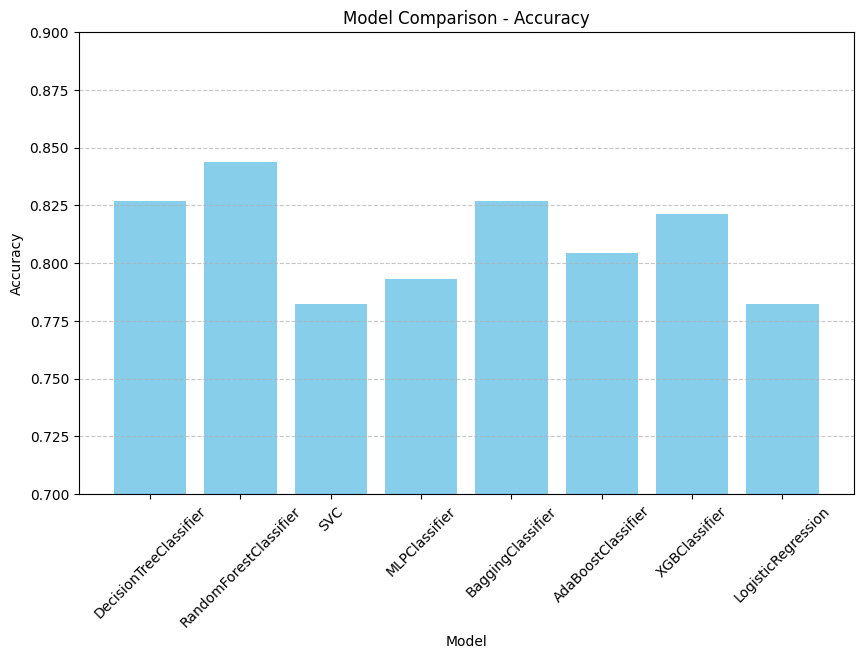

{'DecisionTreeClassifier': {'best_parameters': {'classifier__max_depth': None,
   'classifier__min_samples_leaf': 8,
   'classifier__min_samples_split': 2,
   'classifier__random_state': 0},
  'accuracy': 0.8268156424581006},
 'RandomForestClassifier': {'best_parameters': {'classifier__max_depth': 20,
   'classifier__max_features': None,
   'classifier__min_samples_leaf': 4,
   'classifier__min_samples_split': 2,
   'classifier__n_estimators': 200,
   'classifier__random_state': 0},
  'accuracy': 0.8435754189944135},
 'SVC': {'best_parameters': {'classifier__C': 100,
   'classifier__gamma': 0.001,
   'classifier__kernel': 'sigmoid',
   'classifier__random_state': 0},
  'accuracy': 0.7821229050279329},
 'MLPClassifier': {'best_parameters': {'classifier__activation': 'tanh',
   'classifier__alpha': 0.05,
   'classifier__early_stopping': True,
   'classifier__hidden_layer_sizes': (100,),
   'classifier__learning_rate_init': 0.01,
   'classifier__max_iter': 500,
   'classifier__random_stat

In [16]:
batch_preprocessor = BatchProcessModel(X, y)
batch_preprocessor.gen_results()
batch_preprocessor.plot_results()
batch_preprocessor.results

### Predict based on result


In [22]:
random_forest_classifier = RandomForestClassifier(
    max_depth=20,
    max_features=None,
    min_samples_leaf=4,
    min_samples_split=2,
    n_estimators=100,
    random_state=0,
)

best_model = Pipeline([
    ("preprocessor", batch_preprocessor.preprocessor),
    ("classifier", random_forest_classifier)
])

best_model.fit(X, y)

origin_test_df = pd.read_csv('./test.csv')
test_df = feature_engineering(origin_test_df)

predictions = best_model.predict(test_df)
output = pd.DataFrame({'PassengerId': origin_test_df['PassengerId'], 'Survived': predictions})
output.to_csv('titanic_predictions.csv', index=False)

In [23]:
output

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


# References
- Agarwal, A. (2020, November 25). Titanic survivors prediction with machine learning algorithms. LinkedIn. https://www.linkedin.com/pulse/titanic-survivors-prediction-machine-learning-anant-agarwal/
- Bohorquez, N. (2021, May 7). How to use machine learning to determine titanic survivors. ActiveState. https://www.activestate.com/blog/how-to-use-machine-learning-to-determine-titanic-survivors/
- Donges, N. (2018, May 15). Predicting the survival of Titanic passengers. Medium. https://towardsdatascience.com/predicting-the-survival-of-titanic-passengers-30870ccc7e8
- GeeksforGeeks. (2023, May 6). Titanic survival prediction using machine learning. GeeksforGeeks. https://www.geeksforgeeks.org/titanic-survival-prediction-using-tensorflow-in-python/
- Kenny, D., Kiggans, M., & Smirnov, A. (n.d.). Titanic machine learning from disaster - LSU. Titanic Machine Learning from Disaster. https://www.math.lsu.edu/system/files/Titanic%20Report.pdf
- Melodyyip. (2022, May 28). Titanic survival prediction using machine learning. Medium. https://medium.com/@melodyyip_/titanic-survival-prediction-using-machine-learning-89a779656113
- Randerson112358. (2019, July 22). Titanic survival prediction using machine learning. Medium. https://betterprogramming.pub/titanic-survival-prediction-using-machine-learning-4c5ff1e3fa16
- Titanic survival prediction using machine learning - pianalytix. Pianalytix. (n.d.). https://pianalytix.com/titanic-survival-prediction-using-machine-learning/ 

